### Model Training

##### 1.1 import Data and Required P

importing Pandas , Numpy , Matplotlib, Seaborn and Warnings Lbrary 

In [2]:
## Basic Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from xgboost import XGBRegressor 
from catboost import CatBoostRegressor
import warnings


### Import the CSV Data as Pdndas DataFrame 

In [5]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables 

In [8]:
x=df.drop(columns=['math_score'],axis=1)
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y=df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [10]:
## Create Column Transformer with 3 types of transformers 
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns 

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [ ]:
x=preprocessor.fit_transform(x)

In [17]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [18]:
## Separate Dataset into train and test 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,y_train.shape

((700, 19), (700,))

### Create an Evaluate Function to give all metrics after model Training 

In [ ]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    
    return mae, rmse , r2_square

In [21]:
models={
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor ':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random FOrest Regressor ':RandomForestRegressor(),
    
    'XGBRegressor ':XGBRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=False),
    'Adaboost Regressor ':AdaBoostRegressor(),
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) # train model 
    
    # Make Predictions 
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    ## Evaluate Train and Test Dataset 
    
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Set ")
    print('- Root mean squared error : {:.4f}'.format(model_train_rmse))
    print('- mean absolute error {:.4f}'.format(model_train_mae))
    print('- r2 Score : {:.4f}'.format(model_train_r2))
    
    print('-------------------------------------------------------')
    
    print("Model Performance for Testing Set ")
    print('- Root mean squared error : {:.4f}'.format(model_test_rmse))
    print('- mean absolute error {:.4f}'.format(model_test_mae))
    print('- r2 Score : {:.4f}'.format(model_test_r2))
    
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training Set 
- Root mean squared error : 5.2483
- mean absolute error 27.5447
- r2 Score : 0.8751
-------------------------------------------------------
Model Performance for Testing Set 
- Root mean squared error : 5.5576
- mean absolute error 30.8866
- r2 Score : 0.8759


Lasso
Model Performance for Training Set 
- Root mean squared error : 6.5106
- mean absolute error 42.3875
- r2 Score : 0.8078
-------------------------------------------------------
Model Performance for Testing Set 
- Root mean squared error : 6.8705
- mean absolute error 47.2041
- r2 Score : 0.8103


Ridge
Model Performance for Training Set 
- Root mean squared error : 5.2487
- mean absolute error 27.5484
- r2 Score : 0.8751
-------------------------------------------------------
Model Performance for Testing Set 
- Root mean squared error : 5.5566
- mean absolute error 30.8757
- r2 Score : 0.8759


K-Neighbors Regressor 
Model Performance for Training Set 
- Root mean sq

In [22]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name ', 'r2_score']).sort_values(by=['r2_score'],ascending=False)

,model name,r2_score
2,Ridge,0.875907
0,Linear Regression,0.875863
7,CatBoost Regressor,0.852108
5,Random FOrest Regressor,0.847989
8,Adaboost Regressor,0.831423
6,XGBRegressor,0.811816
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772328
4,Decision Tree,0.726794


### Linear Regression 

In [23]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)

print("Accuracy Score of the Model is %.2f" %score)


Accuracy Score of the Model is 0.88


### Plot y_pred and y_test

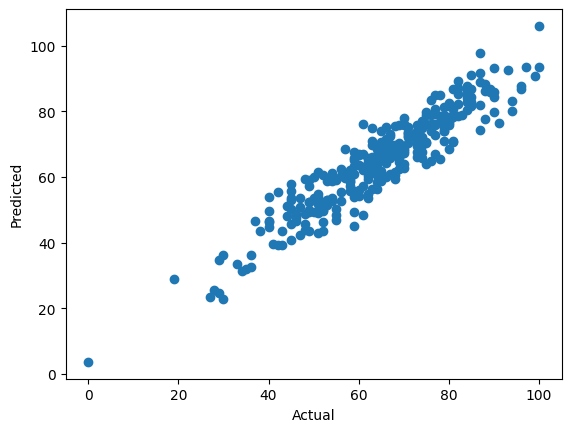

In [25]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel("Predicted");


<Axes: xlabel='math_score'>

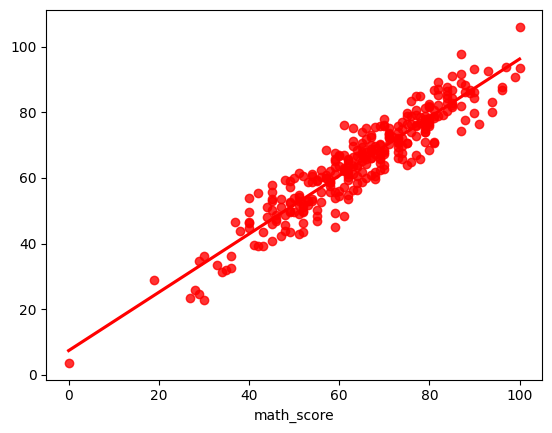

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

#### Difference between Actual and Predicted Values 

In [27]:
pred_df=pd.DataFrame({'Actual Value ':y_test,'predicted Value ':y_pred,'Difference ':y_test-y_pred})
pred_df

,Actual Value,predicted Value,Difference
521,91,76.511652,14.488348
737,53,58.898180,-5.898180
740,80,76.938478,3.061522
660,74,76.965881,-2.965881
411,84,87.633152,-3.633152
...,...,...,...
468,77,72.854766,4.145234
935,70,62.606548,7.393452
428,65,58.650347,6.349653
7,40,44.841375,-4.841375


In [30]:
lin_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}